In [1]:
from renko import Renko
import pandas as pd
import pretty
%config InlineBackend.figure_format = 'retina'

In [2]:
t = pd.read_hdf('t.hdf')
t

,Date,Time,Price,Size
4483023,2022-05-09,19:10:06.010,2271.41,3
4483024,2022-05-09,19:10:06.010,2271.41,41
4483025,2022-05-09,19:10:06.010,2271.41,44
4483026,2022-05-09,19:10:06.010,2271.41,93
4483027,2022-05-09,19:10:06.010,2271.46,272
...,...,...,...,...
4483422,2022-05-09,19:10:10.460,2273.24,1228
4483423,2022-05-09,19:10:10.460,2273.26,3
4483424,2022-05-09,19:10:10.460,2273.26,10
4483425,2022-05-09,19:10:10.460,2273.26,211


In [8]:
# Create new renko instance. Give brick size and list of close prices as parameters
rnk = Renko(0.1, t.Price)
rnk.create_renko()

rnk.bricks[:10]

[{'type': 'first', 'open': 2271.41, 'close': 2271.41},
 {'type': 'up', 'open': 2271.41, 'close': 2271.51},
 {'type': 'up', 'open': 2271.51, 'close': 2271.61},
 {'type': 'up', 'open': 2271.61, 'close': 2271.71},
 {'type': 'up', 'open': 2271.71, 'close': 2271.81},
 {'type': 'up', 'open': 2271.81, 'close': 2271.91},
 {'type': 'down', 'open': 2271.81, 'close': 2271.71, 'high': 2271.99},
 {'type': 'down', 'open': 2271.71, 'close': 2271.61},
 {'type': 'down', 'open': 2271.61, 'close': 2271.51},
 {'type': 'down', 'open': 2271.51, 'close': 2271.41}]

In [20]:
X = pd.DataFrame(rnk.bricks)
X['color'] = np.where(X.type == 'up', 'green', 'red')
X['mid'] = (X.close + X.open) / 2
X.head()

,type,open,close,high,low,color,mid
0,first,2271.41,2271.41,NaN,NaN,red,2271.41
1,up,2271.41,2271.51,NaN,NaN,green,2271.46
2,up,2271.51,2271.61,NaN,NaN,green,2271.56
3,up,2271.61,2271.71,NaN,NaN,green,2271.66
4,up,2271.71,2271.81,NaN,NaN,green,2271.76


(2271.0, 2274.0)

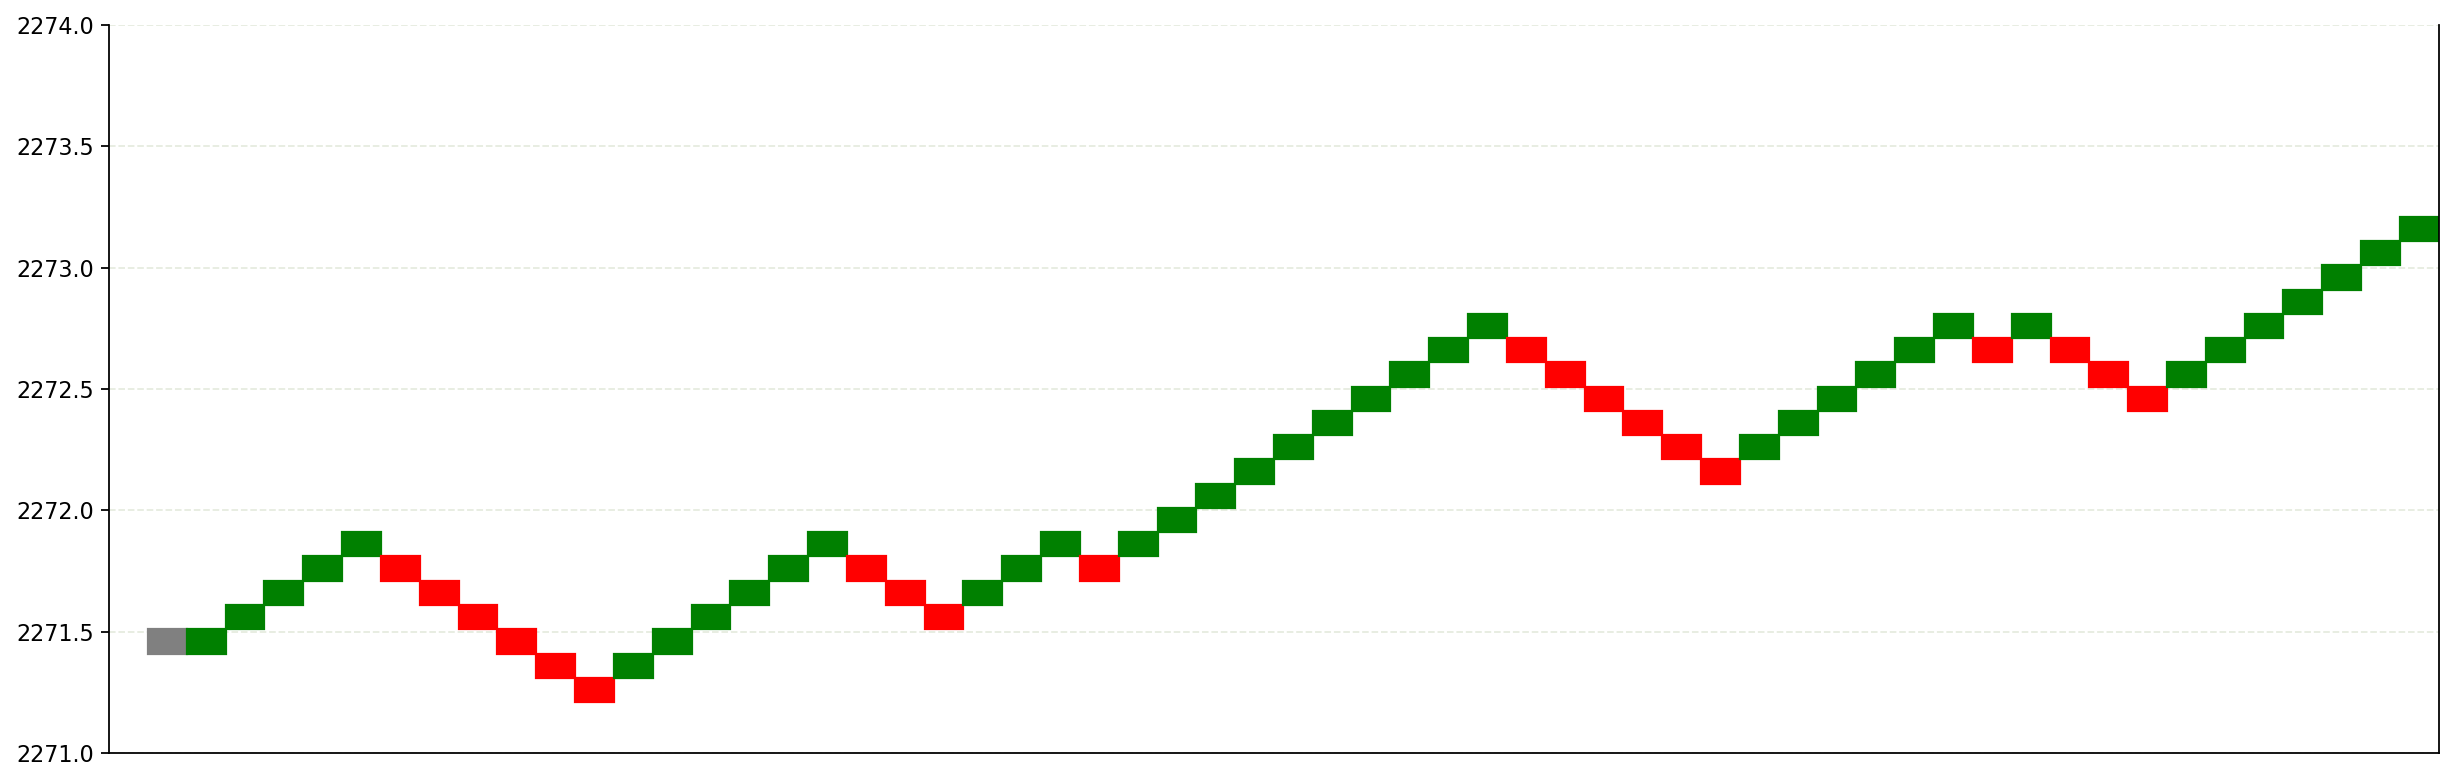

In [12]:
fig, ax = rnk.draw_chart()
ax.set_ylim(2271, 2274)

In [13]:
import plotly.graph_objects as go
import numpy as np
from plotly_resampler import FigureWidgetResampler

In [21]:
fig = FigureWidgetResampler(go.FigureWidget(layout={'height':300, 'template': 'plotly_white',  
                              'margin': dict(l=45, r=5, b=10, t=25, pad=3), 'legend_orientation': 'h'}))
k = 290
fig.add_scattergl(name='B', mode='markers', y=X.mid, 
                  marker_symbol='square', marker_size=15, marker_line_width=1, 
                  marker_line_color="black", marker_color=X.color)

fig

FigureWidgetResampler({
    'data': [{'marker': {'color': array(['red', 'green', 'green', 'green', 'green', 'g…

In [28]:
fig.data[0].marker.size=15